# Analysis of Property Values and Diversity in Austin

## Data Munging

### This workbook primarily going through primary data sources, and perform merge to create the final data set for evaluation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import linregress
import matplotlib.style as style
import gmaps
import json
import folium

# Google developer API key
from config import gkey

ModuleNotFoundError: No module named 'config'

In [4]:
zillow_data1= "data_sources/zillow_data/zillow_medianhome_matched.csv"
zillow_pd= pd.read_csv(zillow_data1)
zillow_pd.head()

Zip    City             County   Type   Area      Value  Year
0  76574  Taylor  Williamson County  Rural  North  106847.78  2011
1  76574  Taylor  Williamson County  Rural  North  106776.56  2012
2  76574  Taylor  Williamson County  Rural  North  107119.61  2013
3  76574  Taylor  Williamson County  Rural  North  107849.07  2014
4  76574  Taylor  Williamson County  Rural  North  109096.49  2015

In [5]:
census_data1= "data_sources/census_data/combined_census_cleaned.csv"
census_pd= pd.read_csv(census_data1)
census_pd.head()

Zip  Total-Population  Hispanic  White  Black  Native  Asian  Other  \
0  76574             17213      35.3   54.0    8.6     0.0    1.8    0.3   
1  76574             17775      34.5   53.6    8.9     0.0    2.0    1.0   
2  76574             18037      36.8   51.1    9.8     0.0    0.2    2.2   
3  76574             18135      35.3   51.9    9.9     0.0    0.4    2.5   
4  76574             18281      41.4   46.0    9.6     0.1    0.7    2.1   

   Total  Diversity Index  Year    City  
0  100.0         0.576062  2011  Taylor  
1  100.0         0.585258  2012  Taylor  
2  100.1         0.593363  2013  Taylor  
3  100.0         0.595588  2014  Taylor  
4   99.9         0.607297  2015  Taylor

In [6]:
merge_data= pd.merge(zillow_pd,census_pd, on=["Zip","Year"])
merge_data

Zip       City_x             County      Type     Area      Value  \
0    76574       Taylor  Williamson County     Rural    North  106847.78   
1    76574       Taylor  Williamson County     Rural    North  106776.56   
2    76574       Taylor  Williamson County     Rural    North  107119.61   
3    76574       Taylor  Williamson County     Rural    North  107849.07   
4    76574       Taylor  Williamson County     Rural    North  109096.49   
5    76574       Taylor  Williamson County     Rural    North  111104.17   
6    76574       Taylor  Williamson County     Rural    North  113822.62   
7    78602      Bastrop     Bastrop County     Rural     East  115163.33   
8    78602      Bastrop     Bastrop County     Rural     East  115852.60   
9    78602      Bastrop     Bastrop County     Rural     East  116555.39   
10   78602      Bastrop     Bastrop County     Rural     East  117725.46   
11   78602      Bastrop     Bastrop County     Rural     East  119269.74   
12   78602      Bastrop     Bastrop County     Rural     East  121642.50   
13   78602      Bastrop     Bastrop County     Rural     East  124553.57   
14   78610         Buda        Hays County  Suburban    South  169191.11   
15   78610         Buda        Hays County  Suburban    South  170217.19   
16   78610         Buda        Hays County  Suburban    South  171498.53   
17   78610         Buda        Hays County  Suburban    South  173437.04   
18   78610         Buda        Hays County  Suburban    South  176327.63   
19   78610         Buda        Hays County  Suburban    South  179742.08   
20   78610         Buda        Hays County  Suburban    South  183435.71   
21   78612  Cedar Creek     Bastrop County     Rural     East  114037.22   
22   78612  Cedar Creek     Bastrop County     Rural     East  115214.58   
23   78612  Cedar Creek     Bastrop County     Rural     East  116302.45   
24   78612  Cedar Creek     Bastrop County     Rural     East  117620.83   
25   78612  Cedar Creek     Bastrop County     Rural     East  119150.88   
26   78612  Cedar Creek     Bastrop County     Rural     East  121744.58   
27   78612  Cedar Creek     Bastrop County     Rural     East  125026.59   
28   78613   Cedar Park  Williamson County  Suburban    North  192908.33   
29   78613   Cedar Park  Williamson County  Suburban    North  193429.69   
..     ...          ...                ...       ...      ...        ...   
474  78756       Austin      Travis County     Urban  Central  310506.67   
475  78756       Austin      Travis County     Urban  Central  317701.19   
476  78757       Austin      Travis County     Urban  Central  226716.11   
477  78757       Austin      Travis County     Urban  Central  229214.06   
478  78757       Austin      Travis County     Urban  Central  232507.35   
479  78757       Austin      Travis County     Urban  Central  237074.54   
480  78757       Austin      Travis County     Urban  Central  242887.28   
481  78757       Austin      Travis County     Urban  Central  249822.08   
482  78757       Austin      Travis County     Urban  Central  257233.33   
483  78758       Austin      Travis County  Suburban    North  132487.78   
484  78758       Austin      Travis County  Suburban    North  132670.83   
485  78758       Austin      Travis County  Suburban    North  133483.33   
486  78758       Austin      Travis County  Suburban    North  135059.26   
487  78758       Austin      Travis County  Suburban    North  137432.46   
488  78758       Austin      Travis County  Suburban    North  141390.83   
489  78758       Austin      Travis County  Suburban    North  146266.67   
490  78759       Austin      Travis County  Suburban    North  262702.78   
491  78759       Austin      Travis County  Suburban    North  264272.40   
492  78759       Austin      Travis County  Suburban    North  266435.29   
493  78759       Austin      Travis County  Suburban    North  270142.59   
494  78759       Austin      Travis County  Suburban   

In [7]:
merge_data = merge_data.drop(["City_y"], axis=1)
merge_data

Zip       City_x             County      Type     Area      Value  \
0    76574       Taylor  Williamson County     Rural    North  106847.78   
1    76574       Taylor  Williamson County     Rural    North  106776.56   
2    76574       Taylor  Williamson County     Rural    North  107119.61   
3    76574       Taylor  Williamson County     Rural    North  107849.07   
4    76574       Taylor  Williamson County     Rural    North  109096.49   
5    76574       Taylor  Williamson County     Rural    North  111104.17   
6    76574       Taylor  Williamson County     Rural    North  113822.62   
7    78602      Bastrop     Bastrop County     Rural     East  115163.33   
8    78602      Bastrop     Bastrop County     Rural     East  115852.60   
9    78602      Bastrop     Bastrop County     Rural     East  116555.39   
10   78602      Bastrop     Bastrop County     Rural     East  117725.46   
11   78602      Bastrop     Bastrop County     Rural     East  119269.74   
12   78602      Bastrop     Bastrop County     Rural     East  121642.50   
13   78602      Bastrop     Bastrop County     Rural     East  124553.57   
14   78610         Buda        Hays County  Suburban    South  169191.11   
15   78610         Buda        Hays County  Suburban    South  170217.19   
16   78610         Buda        Hays County  Suburban    South  171498.53   
17   78610         Buda        Hays County  Suburban    South  173437.04   
18   78610         Buda        Hays County  Suburban    South  176327.63   
19   78610         Buda        Hays County  Suburban    South  179742.08   
20   78610         Buda        Hays County  Suburban    South  183435.71   
21   78612  Cedar Creek     Bastrop County     Rural     East  114037.22   
22   78612  Cedar Creek     Bastrop County     Rural     East  115214.58   
23   78612  Cedar Creek     Bastrop County     Rural     East  116302.45   
24   78612  Cedar Creek     Bastrop County     Rural     East  117620.83   
25   78612  Cedar Creek     Bastrop County     Rural     East  119150.88   
26   78612  Cedar Creek     Bastrop County     Rural     East  121744.58   
27   78612  Cedar Creek     Bastrop County     Rural     East  125026.59   
28   78613   Cedar Park  Williamson County  Suburban    North  192908.33   
29   78613   Cedar Park  Williamson County  Suburban    North  193429.69   
..     ...          ...                ...       ...      ...        ...   
474  78756       Austin      Travis County     Urban  Central  310506.67   
475  78756       Austin      Travis County     Urban  Central  317701.19   
476  78757       Austin      Travis County     Urban  Central  226716.11   
477  78757       Austin      Travis County     Urban  Central  229214.06   
478  78757       Austin      Travis County     Urban  Central  232507.35   
479  78757       Austin      Travis County     Urban  Central  237074.54   
480  78757       Austin      Travis County     Urban  Central  242887.28   
481  78757       Austin      Travis County     Urban  Central  249822.08   
482  78757       Austin      Travis County     Urban  Central  257233.33   
483  78758       Austin      Travis County  Suburban    North  132487.78   
484  78758       Austin      Travis County  Suburban    North  132670.83   
485  78758       Austin      Travis County  Suburban    North  133483.33   
486  78758       Austin      Travis County  Suburban    North  135059.26   
487  78758       Austin      Travis County  Suburban    North  137432.46   
488  78758       Austin      Travis County  Suburban    North  141390.83   
489  78758       Austin      Travis County  Suburban    North  146266.67   
490  78759       Austin      Travis County  Suburban    North  262702.78   
491  78759       Austin      Travis County  Suburban    North  264272.40   
492  78759       Austin      Travis County  Suburban    North  266435.29   
493  78759       Austin      Travis County  Suburban    North  270142.59   
494  78759       Austin      Travis County  Suburban   

In [8]:
merge_data= merge_data.rename(columns={"City_x":"City", "Year_x":"Zillow Years", "Year_y":"Census Years"})
merge_data.to_csv('data_sources/merge_data.csv')

## Godwin Stat Scatter Box Plot

In [9]:
Urban= merge_data[merge_data["Type"]=="Urban"]
Rural= merge_data[merge_data["Type"]=="Rural"]
Suburban= merge_data[merge_data["Type"]=="Suburban"]
Urban.head()

Zip    City         County   Type     Area      Value  Year  \
210  78701  Austin  Travis County  Urban  Central  247179.44  2011   
211  78701  Austin  Travis County  Urban  Central  248615.10  2012   
212  78701  Austin  Travis County  Urban  Central  250772.55  2013   
213  78701  Austin  Travis County  Urban  Central  254295.37  2014   
214  78701  Austin  Travis County  Urban  Central  259944.74  2015   

     Total-Population  Hispanic  White  Black  Native  Asian  Other  Total  \
210              5084      12.0   73.1    7.6     0.0    6.6    0.7  100.0   
211              5642      14.1   70.3    5.7     0.0    8.0    1.9  100.0   
212              5915      13.8   70.7    5.2     0.0    7.7    2.6  100.0   
213              6188      14.5   68.4    4.9     0.0    9.5    2.6   99.9   
214              7051      14.1   69.3    3.8     0.2    9.4    3.2  100.0   

     Diversity Index  
210         0.441058  
211         0.475900  
212         0.471798  
213         0.499017  
214         0.488562

In [10]:
urban_com= merge_data[merge_data["Type"]== "Urban"][["Diversity Index","Value"]]
sub_com= merge_data[merge_data["Type"]== "Suburban"][["Diversity Index","Value"]]
rural_com= merge_data[merge_data["Type"]== "Rural"][["Diversity Index","Value"]]

In [11]:
stats.f_oneway(urban_com,sub_com,rural_com)

F_onewayResult(statistic=array([12.84756769, 20.45557918]), pvalue=array([3.62029435e-06, 2.88644238e-09]))

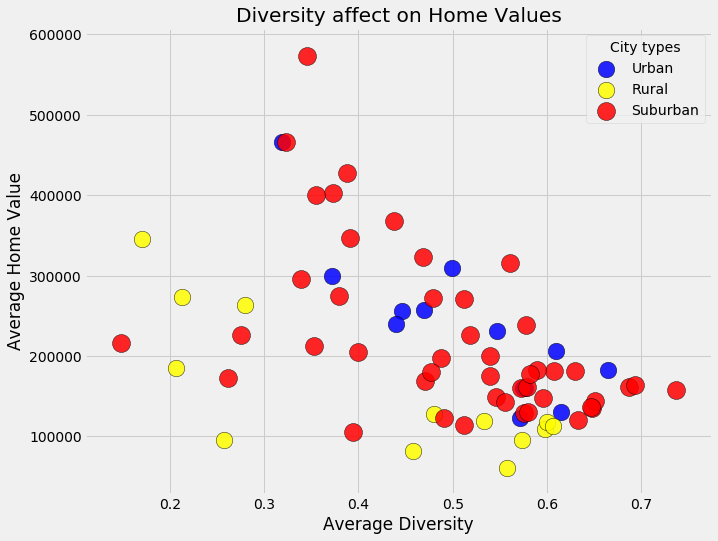

In [12]:
plt.rcParams['figure.figsize']=(10,8) # set the figure size
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme
plt.grid()
Urban_Div= Urban.groupby(["Zip"])["Diversity Index"].mean()
Urban_HV= Urban.groupby(["Zip"])["Value"].mean()

Rural_Div= Rural.groupby(["Zip"])["Diversity Index"].mean()
Rural_HV= Rural.groupby(["Zip"])["Value"].mean()

Suburban_Div= Suburban.groupby(["Zip"])["Diversity Index"].mean()
Suburban_HV= Suburban.groupby(["Zip"])["Value"].mean()

plt.scatter(Urban_Div,Urban_HV, facecolor= "blue", alpha=0.85, edgecolor= "black", marker="o", label= "Urban", s=3*Urban["Zip"].count())
plt.scatter(Rural_Div,Rural_HV, facecolor= "yellow", alpha=0.85, edgecolor= "black", marker="o", label= "Rural", s=3*Rural["Zip"].count())
plt.scatter(Suburban_Div, Suburban_HV, facecolor= "red", alpha=0.85, edgecolor= "black", marker="o", label= "Suburban", s= Suburban["Zip"].count())

plt.xlabel("Average Diversity")
plt.ylabel("Average Home Value")
plt.title("Diversity affect on Home Values")
plt.grid()
# Create a legend
plt.legend(title="City types")
plt.savefig("images/01-01-godwin-scatter.png")
plt.show()

## Eric - Regression Analysis

#### Creating sorted data for each area type

In [13]:
# Gathering data for Urban plot
urban_df = merge_data[merge_data['Type'] == "Urban"]
urban_year = urban_df['Year']
urban_di = urban_df['Diversity Index']
urban_value = urban_df['Value']

# Gathering data for Suburban plot
suburban_df = merge_data[merge_data['Type'] == "Suburban"]
suburban_year = suburban_df['Year']
suburban_di = suburban_df['Diversity Index']
suburban_value = suburban_df['Value']

# Gathering data for Rural plot
rural_df = merge_data[merge_data['Type'] == "Rural"]
rural_year = rural_df['Year']
rural_di = rural_df['Diversity Index']
rural_value = rural_df['Value']

#### Scatter and Line Plots of Area Types

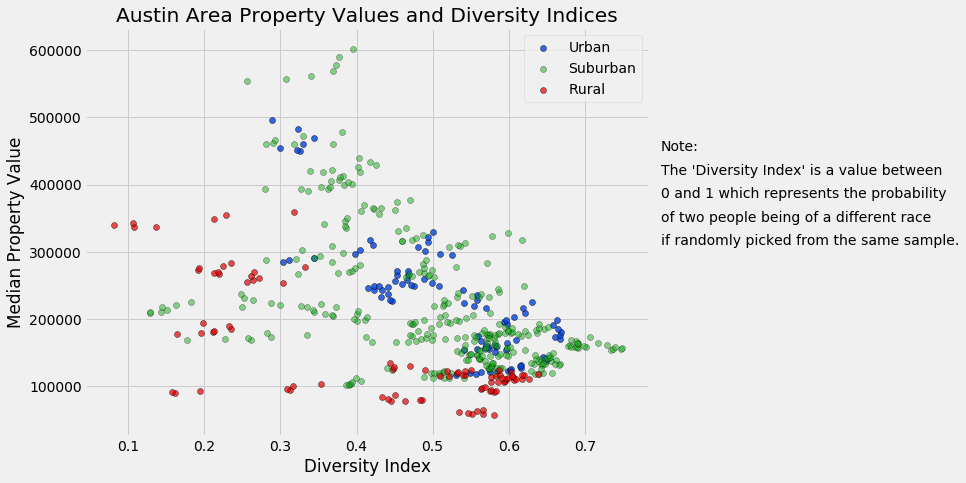

In [14]:
plt.rcParams['figure.figsize']=(9,7) # set the figure size
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme
plt.grid()

urban_bplot = plt.scatter(urban_di, urban_value, facecolors='xkcd:blue', edgecolors='black', 
                    alpha=.8, label="Urban")
suburban_bplot = plt.scatter(suburban_di, suburban_value, facecolors='xkcd:green', edgecolors='black',
                    alpha=.5, label="Suburban")
rural_bplot = plt.scatter(rural_di, rural_value, facecolors='xkcd:red', edgecolors='black', 
                    alpha=.7, label="Rural")
plt.title('Austin Area Property Values and Diversity Indices')
plt.ylabel('Median Property Value')
plt.xlabel('Diversity Index')
plt.text(.8, 450000, "Note:")
plt.text(.8, 415000, "The 'Diversity Index' is a value between")
plt.text(.8, 380000, "0 and 1 which represents the probability")
plt.text(.8, 345000, "of two people being of a different race")
plt.text(.8, 310000, "if randomly picked from the same sample.")
plt.legend()
plt.grid()
plt.savefig("images/02-01-eric-value-diversity-scatter.png")
plt.show()

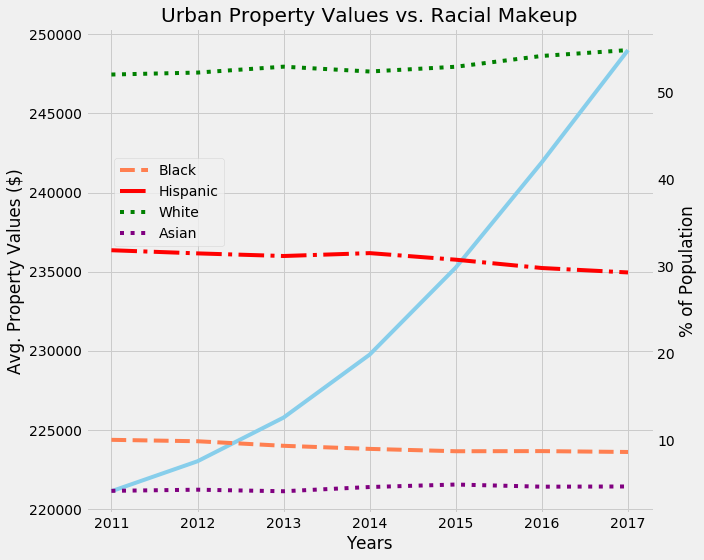

In [15]:
plt.rcParams['figure.figsize']=(10,8) # set the figure size
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme

urban_sort = urban_df.groupby('Year')
urban_avg_values = urban_sort['Value'].mean()
urban_years = urban_sort['Year'].mean()
urban_avg_di = urban_sort['Diversity Index'].mean()
urban_avg_black = urban_sort['Black'].mean()
urban_avg_hisp = urban_sort['Hispanic'].mean()
urban_avg_white = urban_sort['White'].mean()
urban_avg_asian = urban_sort['Asian'].mean()

fig, ax1 = plt.subplots()
ax1.plot(urban_years, urban_avg_values, color='skyblue')
ax1.set_xlabel('Years')
ax1.set_ylabel('Avg. Property Values ($)')


ax2 = ax1.twinx()
ax2.plot(urban_years, urban_avg_black, color='coral', linestyle='--')
ax2.plot(urban_years, urban_avg_hisp, color='red', linestyle ='-.')
ax2.plot(urban_years, urban_avg_white, color='green', linestyle=':')
ax2.plot(urban_years, urban_avg_asian, color='purple', linestyle=':')
ax2.set_ylabel('% of Population')
ax2.grid(b=False)
plt.title('Urban Property Values vs. Racial Makeup')
plt.legend(loc=(.05,.55))
fig.tight_layout()
plt.savefig("images/02-02-eric-urban-line.png")
plt.show()

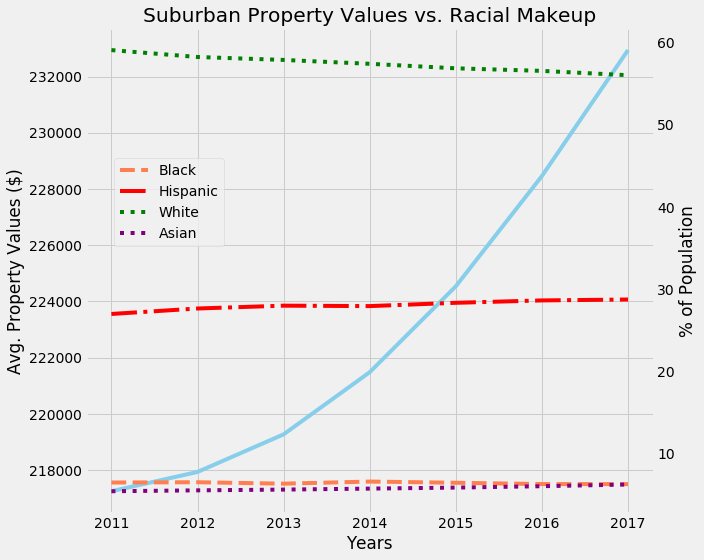

In [16]:
plt.rcParams['figure.figsize']=(10,8) # set the figure size
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme

suburban_sort = suburban_df.groupby('Year')
suburban_avg_values = suburban_sort['Value'].mean()
suburban_years = suburban_sort['Year'].mean()
suburban_avg_di = suburban_sort['Diversity Index'].mean()
suburban_avg_black = suburban_sort['Black'].mean()
suburban_avg_hisp = suburban_sort['Hispanic'].mean()
suburban_avg_white = suburban_sort['White'].mean()
suburban_avg_asian = suburban_sort['Asian'].mean()

fig, ax1 = plt.subplots()
ax1.plot(suburban_years, suburban_avg_values, color='skyblue')
ax1.set_xlabel('Years')
ax1.set_ylabel('Avg. Property Values ($)')


ax2 = ax1.twinx()
ax2.plot(suburban_years, suburban_avg_black, color='coral', linestyle='--')
ax2.plot(suburban_years, suburban_avg_hisp, color='red', linestyle ='-.')
ax2.plot(suburban_years, suburban_avg_white, color='green', linestyle=':')
ax2.plot(suburban_years, suburban_avg_asian, color='purple', linestyle=':')
ax2.set_ylabel('% of Population')
ax2.grid(b=False)
plt.title('Suburban Property Values vs. Racial Makeup')
plt.legend(loc=(.05,.55))
fig.tight_layout()
plt.savefig("images/02-03-eric-suburban-line.png")
plt.show()

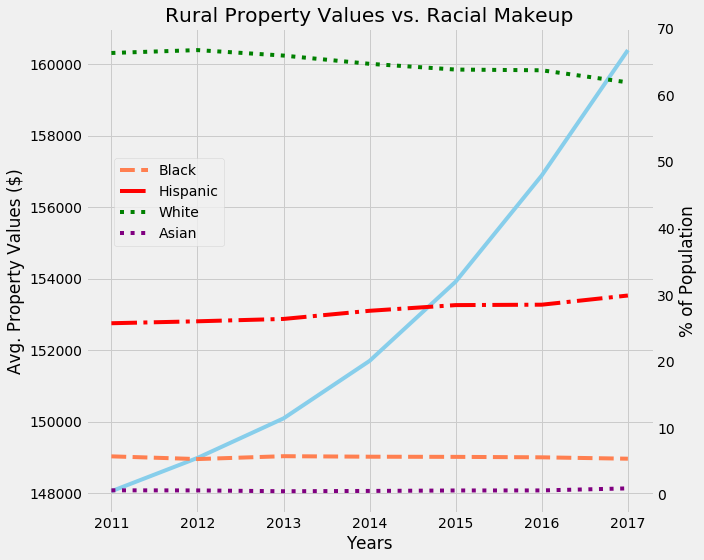

In [17]:
plt.rcParams['figure.figsize']=(10,8) # set the figure size
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme

rural_sort = rural_df.groupby('Year')
rural_avg_values = rural_sort['Value'].mean()
rural_years = rural_sort['Year'].mean()
rural_avg_di = rural_sort['Diversity Index'].mean()
rural_avg_black = rural_sort['Black'].mean()
rural_avg_hisp = rural_sort['Hispanic'].mean()
rural_avg_white = rural_sort['White'].mean()
rural_avg_asian = rural_sort['Asian'].mean()

fig, ax1 = plt.subplots()
ax1.plot(rural_years, rural_avg_values, color='skyblue')
ax1.set_xlabel('Years')
ax1.set_ylabel('Avg. Property Values ($)')


ax2 = ax1.twinx()
ax2.plot(rural_years, rural_avg_black, color='coral', linestyle='--')
ax2.plot(rural_years, rural_avg_hisp, color='red', linestyle ='-.')
ax2.plot(rural_years, rural_avg_white, color='green', linestyle=':')
ax2.plot(rural_years, rural_avg_asian, color='purple', linestyle=':')
ax2.set_ylabel('% of Population')
ax2.grid(b=False)
plt.title('Rural Property Values vs. Racial Makeup')
plt.legend(loc=(.05,.55))
fig.tight_layout()
plt.savefig("images/02-04-eric-rural-line.png")
plt.show()

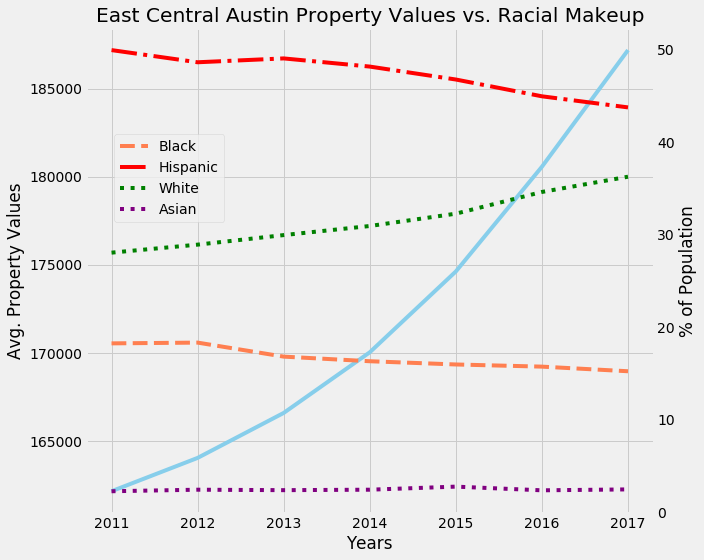

In [18]:
plt.rcParams['figure.figsize']=(10,8) # set the figure size
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme

east_cen_zips = [78702, 78721, 78722, 78723, 78741, 78752]
east_central_df = merge_data[merge_data['Zip'].isin(east_cen_zips)]
east_central_df

east_central_sort = east_central_df.groupby('Year')
east_central_avg_values = east_central_sort['Value'].mean()
east_central_years = east_central_sort['Year'].mean()
east_central_avg_di = east_central_sort['Diversity Index'].mean()
east_central_avg_black = east_central_sort['Black'].mean()
east_central_avg_hisp = east_central_sort['Hispanic'].mean()
east_central_avg_white = east_central_sort['White'].mean()
east_central_avg_asian = east_central_sort['Asian'].mean()

fig, ax1 = plt.subplots()
ax1.plot(east_central_years, east_central_avg_values, color='skyblue')
ax1.set_xlabel('Years')
ax1.set_ylabel('Avg. Property Values')


ax2 = ax1.twinx()
ax2.plot(east_central_years, east_central_avg_black, color='coral', linestyle='--')
ax2.plot(east_central_years, east_central_avg_hisp, color='red', linestyle ='-.')
ax2.plot(east_central_years, east_central_avg_white, color='green', linestyle=':')
ax2.plot(east_central_years, east_central_avg_asian, color='purple', linestyle=':')
ax2.set_ylabel('% of Population')
ax2.grid(b=False)
plt.title('East Central Austin Property Values vs. Racial Makeup')
plt.legend(loc=(.05,.6))
fig.tight_layout()
plt.savefig("images/02-05-eric-eastcentral-line.png")
plt.show()

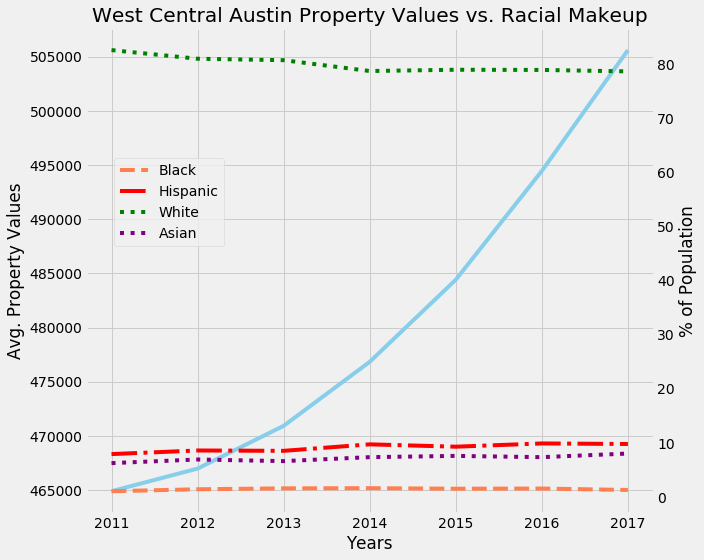

In [19]:
plt.rcParams['figure.figsize']=(10,8) # set the figure size
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme

west_cen_zips = [78703, 78731, 78746]
west_central_df = merge_data[merge_data['Zip'].isin(west_cen_zips)]
west_central_df

west_central_sort = west_central_df.groupby('Year')
west_central_avg_values = west_central_sort['Value'].mean()
west_central_years = west_central_sort['Year'].mean()
west_central_avg_di = west_central_sort['Diversity Index'].mean()
west_central_avg_black = west_central_sort['Black'].mean()
west_central_avg_hisp = west_central_sort['Hispanic'].mean()
west_central_avg_white = west_central_sort['White'].mean()
west_central_avg_asian = west_central_sort['Asian'].mean()

fig, ax1 = plt.subplots()
ax1.plot(west_central_years, west_central_avg_values, color='skyblue')
ax1.set_xlabel('Years')
ax1.set_ylabel('Avg. Property Values')


ax2 = ax1.twinx()
ax2.plot(west_central_years, west_central_avg_black, color='coral', linestyle='--')
ax2.plot(west_central_years, west_central_avg_hisp, color='red', linestyle ='-.')
ax2.plot(west_central_years, west_central_avg_white, color='green', linestyle=':')
ax2.plot(west_central_years, west_central_avg_asian, color='purple', linestyle=':')
ax2.set_ylabel('% of Population')
ax2.grid(b=False)
plt.title('West Central Austin Property Values vs. Racial Makeup')
plt.legend(loc=(.05,.55))
fig.tight_layout()
plt.savefig("images/02-06-eric-westcentral-line.png")
plt.show()

#### Regression Analysis on Overall Data and Urban Data

Linear Regression Analysis (All Zips and Years)
--------------------------
slope: -366763.29582571966    intercept: 391067.6471445414    stderr: 29170.42432524019
r-value: -0.4893771843774806    p-value: 1.0384045132848702e-31


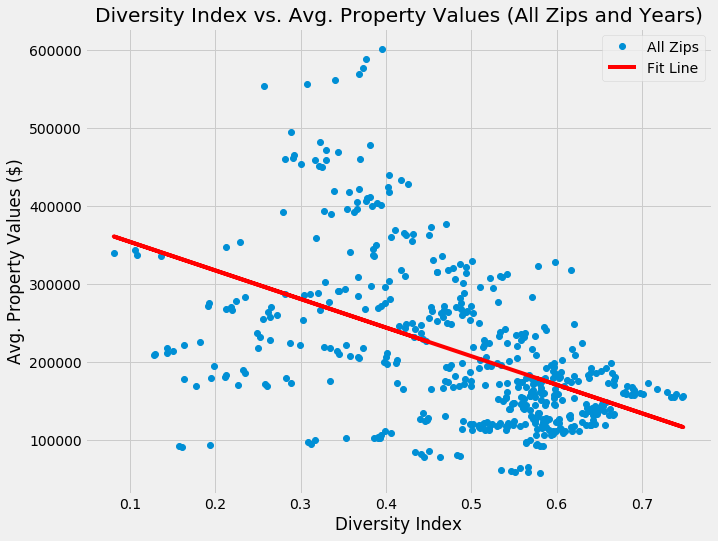

In [20]:
slope, intercept, r_value, p_value, std_err = stats.linregress(merge_data['Diversity Index'], merge_data['Value'])
all_fit = slope * merge_data['Diversity Index'] + intercept
print("Linear Regression Analysis (All Zips and Years)")
print("--------------------------")
print(f"slope: {slope}    intercept: {intercept}    stderr: {std_err}")
print(f"r-value: {r_value}    p-value: {p_value}")

plt.plot(merge_data['Diversity Index'], merge_data['Value'], 'o', label="All Zips")
plt.plot(merge_data['Diversity Index'], all_fit, 'r', label='Fit Line')
plt.xlabel("Diversity Index")
plt.ylabel("Avg. Property Values ($)")
plt.title("Diversity Index vs. Avg. Property Values (All Zips and Years)")
#plt.text(.3, 450000, "Note:")
#plt.text(.3, 415000, "The 'Diversity Index' is a value between")
#plt.text(.3, 380000, "0 and 1 which represents the probability")
#plt.text(.3, 345000, "of two people being of a different race")
#plt.text(.3, 310000, "if randomly picked from the same sample.")
plt.legend()
plt.savefig("images/02-07-eric-regression-all.png")
plt.show()

Linear Regression Analysis (Urban Zips, All Years)
--------------------------
slope: -721519.9070789746    intercept: 604243.1975286677    stderr: 55372.52180057817
r-value: -0.8099936377599413    p-value: 2.4371772271051873e-22


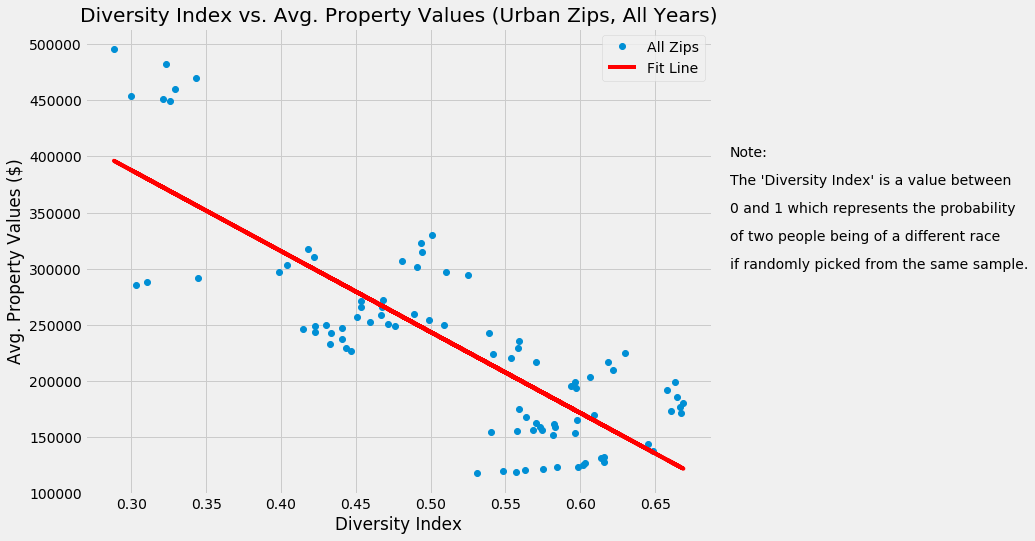

In [21]:
slope, intercept, r_value, p_value, std_err = stats.linregress(urban_di, urban_value)
urban_fit = slope * urban_di + intercept
print("Linear Regression Analysis (Urban Zips, All Years)")
print("--------------------------")
print(f"slope: {slope}    intercept: {intercept}    stderr: {std_err}")
print(f"r-value: {r_value}    p-value: {p_value}")

plt.plot(urban_di, urban_value, 'o', label="All Zips")
plt.plot(urban_di, urban_fit, 'r', label='Fit Line')
plt.xlabel("Diversity Index")
plt.ylabel("Avg. Property Values ($)")
plt.title("Diversity Index vs. Avg. Property Values (Urban Zips, All Years)")
plt.text(.7, 400000, "Note:")
plt.text(.7, 375000, "The 'Diversity Index' is a value between")
plt.text(.7, 350000, "0 and 1 which represents the probability")
plt.text(.7, 325000, "of two people being of a different race")
plt.text(.7, 300000, "if randomly picked from the same sample.")
plt.legend()
plt.savefig("images/02-08-eric-regression-urban.png")
plt.show()

## Aydin Google Heatmap

In [22]:
#Filter used data by 2017
merge_data_n=merge_data[merge_data["Year"]==2017]
merge_data_n=merge_data.groupby(["City"]).mean()
merge_data_n["city"]=merge_data_n.index
merge_data_n["Diversity Index"]=merge_data_n["Diversity Index"]*100

In [23]:
# latitude and longitude
merge_data_n["Lat"]=0.001
merge_data_n["Lng"]=0.001
for  row in merge_data_n["city"]:
    target_city=row
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(target_city+", Texas", gkey)
    
    # Run a request to endpoint and convert result to json
    geo_data = requests.get(target_url).json()
    
    # Print the json
    print(geo_data)
   
    # Extract latitude and longitude
    lat = geo_data["results"][0]["geometry"]["location"]["lat"]
    lng = geo_data["results"][0]["geometry"]["location"]["lng"]
    merge_data_n["Lat"][row]=lat
    merge_data_n["Lng"][row]=lng
#     Print the latitude and longitude
    print('''
        City: {0}
        Latitude: {1}
        Longitude: {2}
        '''.format(target_city, lat, lng))

NameError: name 'gkey' is not defined

 For the heat map, I used the merged data from Zillow and Census .I filtered merged data by 2017 to understand how diverse is Austin and surrounding areas.I added latitude and longitude to my data chart as well to use heatmap. In short, Round Rock, Pflugerville, Leander, Buda, Mountain City, San Marcos and part of the Cedar Park have diverse population compare to rest of the Austin and surrounding areas.

In [24]:
# Plot Heatmap
weight=locations = merge_data_n["Diversity Index"].astype(float)
locations = merge_data_n[["Lat", "Lng"]].astype(float)
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, 
                                 dissipating=False, max_intensity=80, weights=weight,
                                 point_radius=0.15)
# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

## Trevor Zip Map

In [32]:
# create dataframe averaging all seven years of data for overall heatmap
# all_zips
all_zips = merge_data["Zip"].unique()
# get overall values for diversity index and property values
avg_div_index = merge_data.groupby(["Zip"])["Diversity Index"].mean()
avg_value = merge_data.groupby(["Zip"])["Value"].mean()
# Create dataframe
pd.options.display.float_format = '${:,.2f}'.format
ovrl_zips = pd.DataFrame({"Zip": all_zips, "Diversity Index": avg_div_index, "Value": avg_value})
ovrl_zips.head()

Zip  Diversity Index       Value
Zip                                      
76574  76574            $0.60 $108,945.19
78602  78602            $0.53 $118,680.37
78610  78610            $0.54 $174,835.61
78612  78612            $0.60 $118,442.45
78613  78613            $0.49 $197,871.29

In [33]:
# create dataframe for each year
df_2011 = merge_data.loc[merge_data["Year"] == 2011]
df_2012 = merge_data.loc[merge_data["Year"] == 2012]
df_2013 = merge_data.loc[merge_data["Year"] == 2013]
df_2014 = merge_data.loc[merge_data["Year"] == 2014]
df_2015 = merge_data.loc[merge_data["Year"] == 2015]
df_2016 = merge_data.loc[merge_data["Year"] == 2016]
df_2017 = merge_data.loc[merge_data["Year"] == 2017]

In [34]:
# load geoJSON
with open("data_sources/zip_data/Austin_Zipcodes.geojson", "r") as json_file:
    data = json.load(json_file)
tmp = data
tmp

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'zipcode': '78702',
    'name': 'AUSTIN',
    'number_of_records': '45',
    'objectid': '51',
    'zipcodes_id': '45'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-97.691868384007, 30.248482149129],
       [-97.691727278076, 30.248110690045],
       [-97.69159318377, 30.247164548741],
       [-97.691420671847, 30.246030589478],
       [-97.691338740898, 30.245580589807],
       [-97.691876504586, 30.245434909015],
       [-97.692293577628, 30.245242731111],
       [-97.692438794752, 30.245174215551],
       [-97.692517136349, 30.244944800241],
       [-97.692678966586, 30.24476111083],
       [-97.693162756071, 30.244677570451],
       [-97.693744996442, 30.244642813074],
       [-97.694277111611, 30.244645525459],
       [-97.694561341234, 30.244706387897],
       [-97.694749349823, 30.244781769954],
       [-97.694995778683, 30.244863855677],
       [-97.695469792744, 30.24502213783

In [35]:
#get dataset of for all zip coded we will be using
zip_codes = [str(i) for i in merge_data["Zip"].unique()]
# zip_codes = race_df["Zip"].unique()
len(zip_codes)

72

In [36]:
#remove zip codes not in our data set
zips = []
# no_zips = []
for i in range(len(tmp["features"])):
    if tmp["features"][i]["properties"]["zipcode"] in list(zip_codes):
        zips.append(tmp["features"][i])
len(zips)

67

In [37]:
# creating a new JSON object
new_json = dict.fromkeys(["type", "features"])
new_json["type"] = "FeatureCollection"
new_json["features"] = zips
new_json

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'zipcode': '78702',
    'name': 'AUSTIN',
    'number_of_records': '45',
    'objectid': '51',
    'zipcodes_id': '45'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-97.691868384007, 30.248482149129],
       [-97.691727278076, 30.248110690045],
       [-97.69159318377, 30.247164548741],
       [-97.691420671847, 30.246030589478],
       [-97.691338740898, 30.245580589807],
       [-97.691876504586, 30.245434909015],
       [-97.692293577628, 30.245242731111],
       [-97.692438794752, 30.245174215551],
       [-97.692517136349, 30.244944800241],
       [-97.692678966586, 30.24476111083],
       [-97.693162756071, 30.244677570451],
       [-97.693744996442, 30.244642813074],
       [-97.694277111611, 30.244645525459],
       [-97.694561341234, 30.244706387897],
       [-97.694749349823, 30.244781769954],
       [-97.694995778683, 30.244863855677],
       [-97.695469792744, 30.24502213783

In [38]:
#save JSON object as updated-file
with open("../zip_data/atx_zipcodes.json", "w") as outfile:
    json.dump(new_json, outfile, sort_keys=True, indent=4, separators=(',', ': '))

In [39]:
# Create function to generate maps
def create_map(table, zips, mapped_feature1, mapped_feature2, add_text = ''):
    # Reading of the updated GeoJSON file
    atx_geo1 = "../zip_data/atx_zipcodes.json"
    # Initiating a folium map with Austin's Longitude and Latitude
    m = folium.Map(location = [30.2672, -97.7431], zoom_start = 9)
    # creating a choropleth map for diversity
    m.choropleth(
        geo_data = atx_geo1,
        name = "Diversity Index",
        data = table,
        # first element contains location information, second element contains feature of interest
        columns = [zips, mapped_feature1],
        # refers to which key within the GeoJSON to map the ZIP code to
        key_on = 'feature.properties.zipcode',
        fill_color = 'YlOrRd',
        fill_opacity = 0.7,
        line_opacity = 1.0,
    #     fill_color = branca.colormap.linear.YlOrRd_09.scale(0, 1),
        legend_name = (' ').join(mapped_feature1.split('_')).title() + ' by ' + add_text + ' in Austin'
    )
#     folium.LayerControl().add_to(m)
    
    # Create second layer
    # Reading of the updated GeoJSON file
    atx_geo2 = "../zip_data/atx_zipcodes.json"
    # creating a choropleth map for property values
    m.choropleth(
        geo_data = atx_geo2,
        name = "Property Value",
        data = table,
        # first element contains location information, second element contains feature of interest
        columns = [zips, mapped_feature2],
        # refers to which key within the GeoJSON to map the ZIP code to
        key_on = 'feature.properties.zipcode',
        fill_color = 'PuBuGn',
        fill_opacity = 0.7,
        line_opacity = 1.0,
    #     fill_color = branca.colormap.linear.YlOrRd_09.scale(0, 1),
        legend_name = "Property" + (' ').join(mapped_feature2.split('_')).title() + ' by ' + add_text + ' in Austin'
    )
    folium.LayerControl().add_to(m)
    try:
        year = table["Year"].unique()[0].astype(str)
    except:
        year = "Overall"
        
    # save map with filename based on the feature of interest
    m.save(outfile = "../output_data/Combined " + year + "_" + mapped_feature1 + " and Property " + mapped_feature2 + '_map.html')


In [40]:
# Create map for all years combined
create_map(ovrl_zips, "Zip", "Diversity Index", "Value", "Zip Codes")

# Create map for each year
img_2011 = create_map(df_2011, "Zip", "Diversity Index", "Value", "Zip Codes")
create_map(df_2012, "Zip", "Diversity Index", "Value", "Zip Codes")
create_map(df_2013, "Zip", "Diversity Index", "Value", "Zip Codes")
create_map(df_2014, "Zip", "Diversity Index", "Value", "Zip Codes")
create_map(df_2015, "Zip", "Diversity Index", "Value", "Zip Codes")
create_map(df_2016, "Zip", "Diversity Index", "Value", "Zip Codes")
create_map(df_2017, "Zip", "Diversity Index", "Value", "Zip Codes")

## Billy Zip Bar Line

In [41]:
# import merged dataset
df1 = pd.read_csv('data_sources/merge_data.csv')
# check dataset
df1.head()

Unnamed: 0    Zip    City             County   Type   Area       Value  \
0           0  76574  Taylor  Williamson County  Rural  North $106,847.78   
1           1  76574  Taylor  Williamson County  Rural  North $106,776.56   
2           2  76574  Taylor  Williamson County  Rural  North $107,119.61   
3           3  76574  Taylor  Williamson County  Rural  North $107,849.07   
4           4  76574  Taylor  Williamson County  Rural  North $109,096.49   

   Year  Total-Population  Hispanic  White  Black  Native  Asian  Other  \
0  2011             17213    $35.30 $54.00  $8.60   $0.00  $1.80  $0.30   
1  2012             17775    $34.50 $53.60  $8.90   $0.00  $2.00  $1.00   
2  2013             18037    $36.80 $51.10  $9.80   $0.00  $0.20  $2.20   
3  2014             18135    $35.30 $51.90  $9.90   $0.00  $0.40  $2.50   
4  2015             18281    $41.40 $46.00  $9.60   $0.10  $0.70  $2.10   

    Total  Diversity Index  
0 $100.00            $0.58  
1 $100.00            $0.59  
2 $100.10            $0.59  
3 $100.00            $0.60  
4  $99.90            $0.61

In [42]:
# let's look at diversity index change in all zip codes over time
diversityS = df1.groupby('Year')['Diversity Index'].mean()
df2 = diversityS.to_frame()
df2.head(10)

Diversity Index
Year                 
2011            $0.47
2012            $0.48
2013            $0.48
2014            $0.49
2015            $0.49
2016            $0.50
2017            $0.50

In [43]:
# let's look at the home value change in all zip codes over time
valueS = df1.groupby('Year')['Value'].mean()
valueS
df3 = valueS.to_frame()
df3.head(100)

Value
Year            
2011 $205,454.30
2012 $206,402.86
2013 $207,956.08
2014 $210,376.89
2015 $213,723.33
2016 $217,966.16
2017 $222,740.20

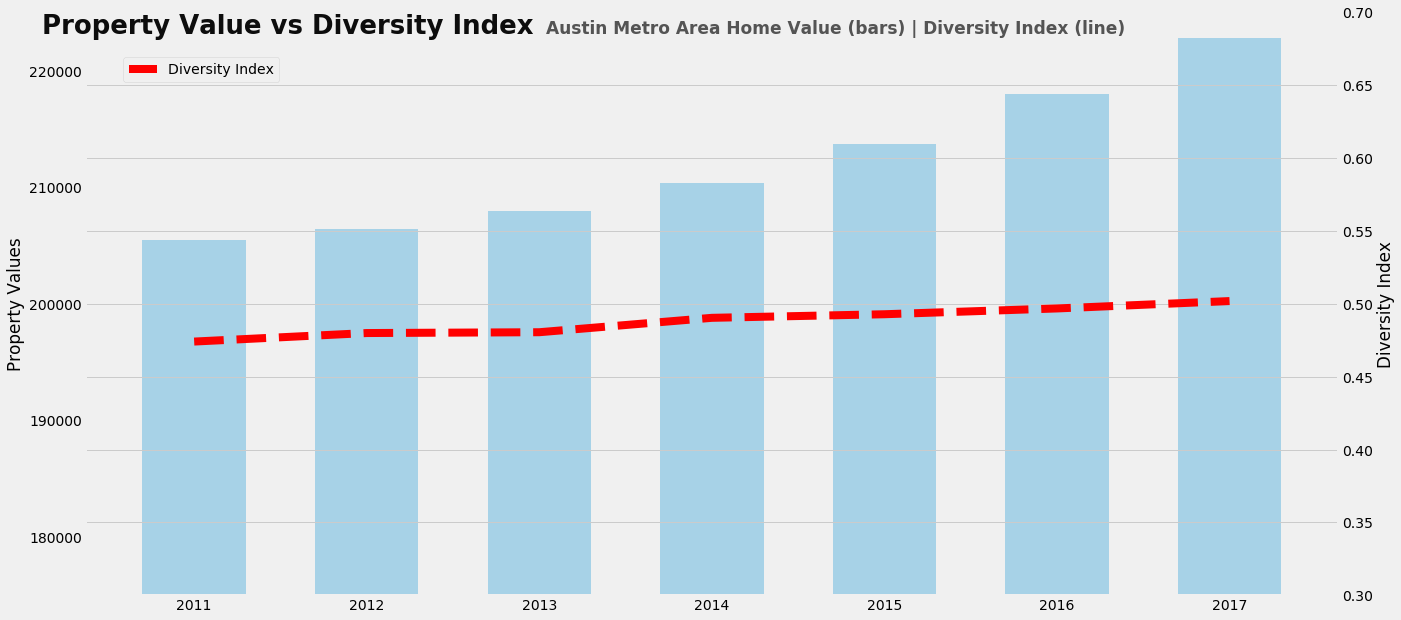

In [44]:
plt.rcParams['figure.figsize']=(20,10) # set the figure size
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme

fig, ax1 = plt.subplots()

# bar chart for property values
ax1.bar(df3.index, df3.Value, alpha=0.3, width=0.6)
ax1.set_ylim(175000,225000)

# the line chart
ax2 = ax1.twinx()  # set up the 2nd axis
ax2.plot(df2['Diversity Index'], 'r-', linewidth = 8, linestyle = '--')
ax2.set_ylim(0.3, 0.7)

ax1.grid(b=False) # turn off grid #2
 
#ax1.set_title('Property Values vs Diversity')

ax1.set_ylabel('Property Values')
#ax1.set_yticklabels(labels = ['$180k','$190k','$200k','$210k','$220k','$230k','$240k'])
ax2.set_ylabel('Diversity Index')
#ax2.set_yticklabels(labels = ['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])

textstr = 'Note:\nCircle size correlates with driver count per city.'
plt.text(0.05, 0.85, s = "Property Value vs Diversity Index",
               fontsize=26, weight='bold', alpha= .95, transform=plt.gcf().transFigure)
 
plt.text(0.4, 0.85, s = "Austin Metro Area Home Value (bars) | Diversity Index (line)",
               fontsize=17, weight='bold', alpha= .65, transform=plt.gcf().transFigure)
plt.legend(loc=(.03,0.88))
plt.savefig('images/05-01-billy-value-diversity-all.png')
plt.show()


In [45]:
## Data specifically show central east Austin

dfEAst = pd.DataFrame()

EastZipList = ['78723', '78754', '78722', '78702', '78721', '78741', '78742']

dfEast = df1.loc[df1['Zip'].isin(EastZipList)]

dfEast['Black & Hispanic'] = dfEast['Black'] + dfEast['Hispanic'] 
dfEast['Asian & Other'] = dfEast['Asian'] + dfEast['Other']


dfEast = dfEast.groupby(['Year'])['Value', 'Diversity Index', 'Black', 'Hispanic', 'Black & Hispanic', 'White', 'Asian & Other'].mean()
dfEast.head()


Value  Diversity Index  Black  Hispanic  Black & Hispanic  White  \
Year                                                                          
2011 $162,633.15            $0.61 $19.08    $45.63            $64.72 $29.33   
2012 $164,253.82            $0.62 $18.83    $44.60            $63.43 $30.18   
2013 $166,564.87            $0.62 $17.87    $44.53            $62.40 $30.73   
2014 $169,775.85            $0.63 $17.93    $43.48            $61.42 $31.75   
2015 $174,063.96            $0.63 $17.53    $43.07            $60.60 $32.02   

      Asian & Other  
Year                 
2011          $5.78  
2012          $6.15  
2013          $6.65  
2014          $6.53  
2015          $7.22

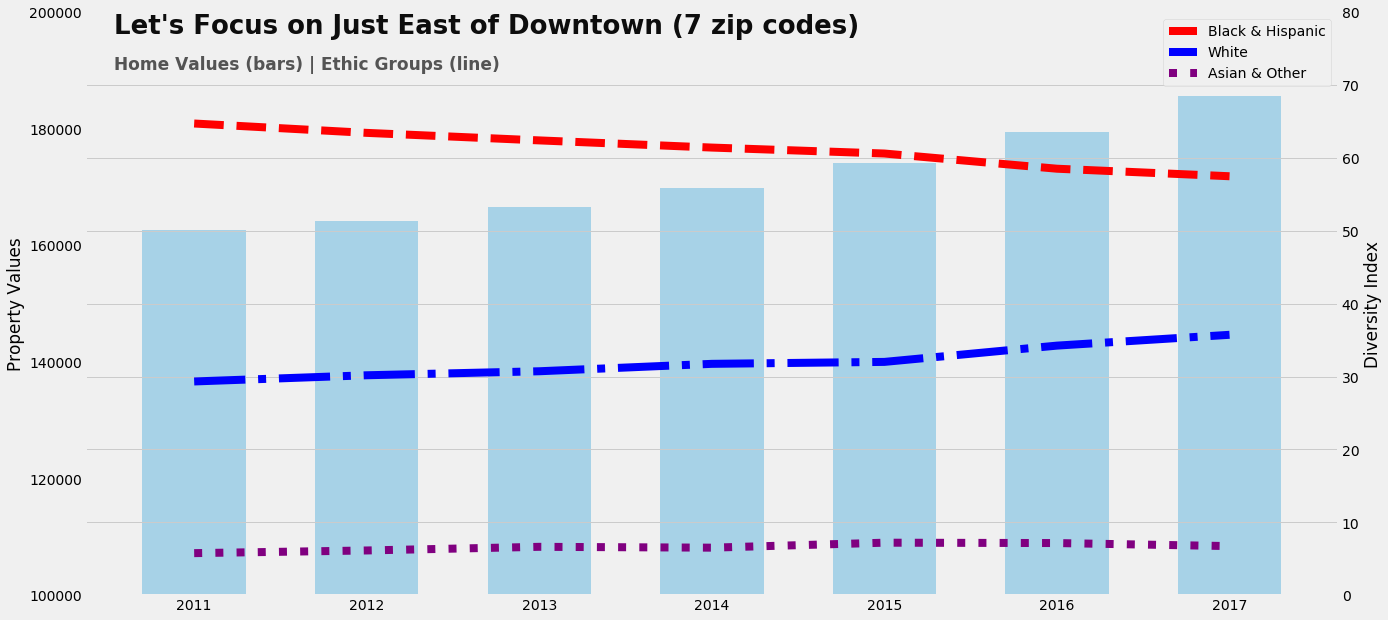

In [46]:
plt.rcParams['figure.figsize']=(20,10) # set the figure size
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme

fig, ax1 = plt.subplots()

# bar chart for property values
ax1.bar(dfEast.index, dfEast.Value, alpha=0.3, width=0.6)
ax1.set_ylim(100000,200000)

# the line chart
ax2 = ax1.twinx()  # set up the 2nd axis
ax2.plot(dfEast['Black & Hispanic'], 'r-', linewidth = 8, linestyle='--')
ax2.plot(dfEast['White'], c='blue', linewidth = 8, linestyle='-.')
ax2.plot(dfEast['Asian & Other'], c='purple', linewidth = 8, linestyle=':')
ax2.set_ylim(0,80)

ax1.grid(b=False) # turn off grid #2
 
#ax1.set_title('Property Values vs Diversity')

ax1.set_ylabel('Property Values')
#ax1.set_yticklabels(labels = ['$130k','$140k','$150k','$160k','$170k','$180k','$190k','$200k'])
ax2.set_ylabel('Diversity Index')
#ax2.set_yticklabels(labels = ['0%','10%','20%','30%','40%','50%','60%','70%','80%'])

plt.text(0.1, 0.85, s = "Let's Focus on Just East of Downtown (7 zip codes)",
               fontsize=26, weight='bold', alpha= .95, transform=plt.gcf().transFigure)
 
plt.text(0.1, 0.8, s = "Home Values (bars) | Ethic Groups (line)",
               fontsize=17, weight='bold', alpha= .65, transform=plt.gcf().transFigure)
plt.legend()
plt.savefig('images/05-02-billy-east-central-only.png')
plt.show()

Here are some notes:

1- Zip map: https://www.google.com/search?q=austin+zip+map&tbm=isch&source=univ&sa=X&ved=2ahUKEwij6vb20frgAhVsja0KHfHdAO0QsAR6BAgFEAE&biw=2560&bih=1337#imgrc=5lVAXSfq9wB34M:

In [47]:
## Data specifically show central east Austin
dfEAst = pd.DataFrame()
zipList = [78722]
dfEast = df1.loc[df1['Zip'].isin(zipList)]

dfEast['Black & Hispanic'] = dfEast['Black'] + dfEast['Hispanic'] 
dfEast['Asian & Other'] = dfEast['Asian'] + dfEast['Other']

dfEast = dfEast.groupby(['Year'])['Value', 'Diversity Index', 'Black', 'Hispanic', 'Black & Hispanic', 'White', 'Asian & Other'].mean()
dfEast.head(25)

Value  Diversity Index  Black  Hispanic  Black & Hispanic  White  \
Year                                                                          
2011 $217,041.11            $0.57 $13.00    $21.30            $34.30 $60.50   
2012 $220,266.67            $0.55 $13.50    $19.10            $32.60 $62.50   
2013 $224,072.06            $0.54 $10.10    $20.10            $30.20 $63.70   
2014 $229,009.72            $0.56 $11.00    $20.10            $31.10 $62.20   
2015 $235,786.40            $0.56 $12.10    $16.50            $28.60 $62.90   
2016 $242,723.33            $0.54 $13.20    $14.30            $27.50 $64.80   
2017 $249,907.54            $0.51 $11.60    $13.40            $25.00 $67.60   

      Asian & Other  
Year                 
2011          $4.60  
2012          $4.10  
2013          $5.40  
2014          $5.90  
2015          $8.50  
2016          $7.60  
2017          $7.40

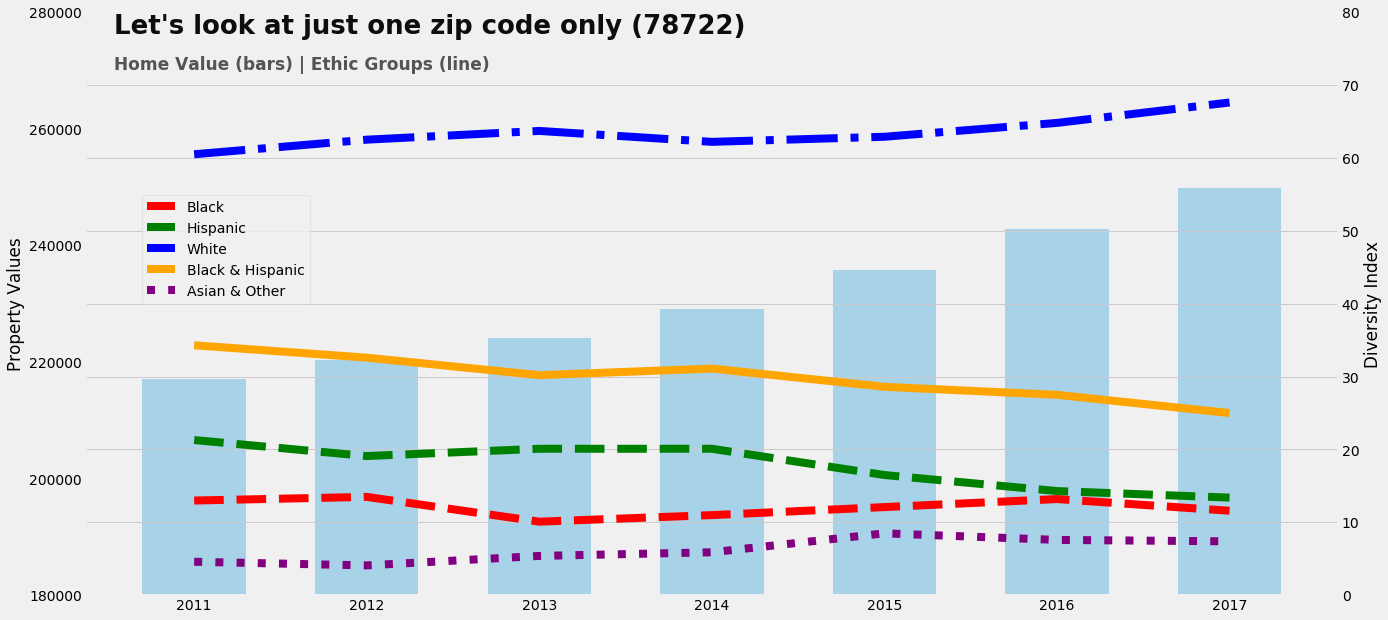

In [48]:
plt.rcParams['figure.figsize']=(20,10) # set the figure size
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme

fig, ax1 = plt.subplots()

# bar chart for property values
ax1.bar(dfEast.index, dfEast.Value, alpha=0.3, width=0.6)
ax1.set_ylim(180000,280000)

# the line chart
ax2 = ax1.twinx()  # set up the 2nd axis
ax2.plot(dfEast['Black'], 'r-', linewidth = 8, linestyle='--')
ax2.plot(dfEast['Hispanic'], 'green', linewidth = 8, linestyle='--')
ax2.plot(dfEast['White'], c='blue', linewidth = 8, linestyle='-.')
ax2.plot(dfEast['Black & Hispanic'], c='orange', linewidth = 8)
ax2.plot(dfEast['Asian & Other'], c='purple', linewidth = 8, linestyle=':')
ax2.set_ylim(0,80)

ax1.grid(b=False) # turn off grid #2
 
#ax1.set_title('Property Values vs Diversity')

ax1.set_ylabel('Property Values')
#ax1.set_yticklabels(labels = ['$180k','$140k','$150k','$160k','$170k','$180k','$190k','$200k'])
ax2.set_ylabel('Diversity Index')
#ax2.set_yticklabels(labels = ['0%','10%','20%','30%','40%','50%','60%','70%','80%'])

plt.text(0.1, 0.85, s = "Let's look at just one zip code only (78722)",
               fontsize=26, weight='bold', alpha= .95, transform=plt.gcf().transFigure)
 
plt.text(0.1, 0.8, s = "Home Value (bars) | Ethic Groups (line)",
               fontsize=17, weight='bold', alpha= .65, transform=plt.gcf().transFigure)
plt.legend(loc=(.045,0.5))
plt.savefig('images/05-03-billy-78722-graph.png')
plt.show()

In [49]:
a = dfEast['Black & Hispanic']
b = dfEast['Value']
linregress(a, b)

LinregressResult(slope=-3720.172417840377, intercept=342491.2738648559, rvalue=-0.9688170714695906, pvalue=0.0003243039756793735, stderr=425.49789540530276)

## Agustin Zip Analysis

In [50]:
merge_data2 = merge_data.copy()
merge_data2['join_on_year'] = merge_data2['Year'] + 1
merge_data2.head()

Zip    City             County   Type   Area       Value  Year  \
0  76574  Taylor  Williamson County  Rural  North $106,847.78  2011   
1  76574  Taylor  Williamson County  Rural  North $106,776.56  2012   
2  76574  Taylor  Williamson County  Rural  North $107,119.61  2013   
3  76574  Taylor  Williamson County  Rural  North $107,849.07  2014   
4  76574  Taylor  Williamson County  Rural  North $109,096.49  2015   

   Total-Population  Hispanic  White  Black  Native  Asian  Other   Total  \
0             17213    $35.30 $54.00  $8.60   $0.00  $1.80  $0.30 $100.00   
1             17775    $34.50 $53.60  $8.90   $0.00  $2.00  $1.00 $100.00   
2             18037    $36.80 $51.10  $9.80   $0.00  $0.20  $2.20 $100.10   
3             18135    $35.30 $51.90  $9.90   $0.00  $0.40  $2.50 $100.00   
4             18281    $41.40 $46.00  $9.60   $0.10  $0.70  $2.10  $99.90   

   Diversity Index  join_on_year  
0            $0.58          2012  
1            $0.59          2013  
2            $0.59          2014  
3            $0.60          2015  
4            $0.61          2016

In [51]:
merge_data3 = merge_data2[['Zip','join_on_year','Value','Diversity Index']]
merge_data3.head()

Zip  join_on_year       Value  Diversity Index
0  76574          2012 $106,847.78            $0.58
1  76574          2013 $106,776.56            $0.59
2  76574          2014 $107,119.61            $0.59
3  76574          2015 $107,849.07            $0.60
4  76574          2016 $109,096.49            $0.61

In [52]:
merge_data4 = pd.merge(merge_data, merge_data3, left_on = ["Zip", "Year"], right_on = ["Zip", "join_on_year"], suffixes = ["","_Prior"])
merge_data4 = merge_data4.drop(["join_on_year"], axis=1)
merge_data4["value_rate"] = merge_data4["Value"]/merge_data4["Value_Prior"] -1
merge_data4["DI_rate"] = merge_data4["Diversity Index"]/merge_data4["Diversity Index_Prior"] -1
merge_data4.head()

Zip    City             County   Type   Area       Value  Year  \
0  76574  Taylor  Williamson County  Rural  North $106,776.56  2012   
1  76574  Taylor  Williamson County  Rural  North $107,119.61  2013   
2  76574  Taylor  Williamson County  Rural  North $107,849.07  2014   
3  76574  Taylor  Williamson County  Rural  North $109,096.49  2015   
4  76574  Taylor  Williamson County  Rural  North $111,104.17  2016   

   Total-Population  Hispanic  White  Black  Native  Asian  Other   Total  \
0             17775    $34.50 $53.60  $8.90   $0.00  $2.00  $1.00 $100.00   
1             18037    $36.80 $51.10  $9.80   $0.00  $0.20  $2.20 $100.10   
2             18135    $35.30 $51.90  $9.90   $0.00  $0.40  $2.50 $100.00   
3             18281    $41.40 $46.00  $9.60   $0.10  $0.70  $2.10  $99.90   
4             18502    $35.40 $49.30 $11.20   $0.10  $0.80  $3.20 $100.00   

   Diversity Index  Value_Prior  Diversity Index_Prior  value_rate  DI_rate  
0            $0.59  $106,847.78                  $0.58      $-0.00    $0.02  
1            $0.59  $106,776.56                  $0.59       $0.00    $0.01  
2            $0.60  $107,119.61                  $0.59       $0.01    $0.00  
3            $0.61  $107,849.07                  $0.60       $0.01    $0.02  
4            $0.62  $109,096.49                  $0.61       $0.02    $0.02

In [53]:
merge_data4["Type"].value_counts()

Suburban    276
Urban        78
Rural        78
Name: Type, dtype: int64

In [54]:
merge_data4.describe()

Zip       Value      Year  Total-Population  Hispanic   White  \
count    $432.00     $432.00   $432.00           $432.00   $432.00 $432.00   
mean  $78,669.97 $213,194.25 $2,014.50        $25,588.46    $28.59  $57.77   
std      $255.62 $102,479.08     $1.71        $17,689.12    $18.21  $21.65   
min   $76,574.00  $58,555.21 $2,012.00         $2,799.00     $3.40   $7.70   
25%   $78,647.25 $137,403.41 $2,013.00        $12,438.50    $13.78  $43.68   
50%   $78,719.00 $180,989.82 $2,014.50        $21,056.50    $22.35  $61.80   
75%   $78,738.25 $266,798.73 $2,016.00        $32,363.00    $41.05  $75.32   
max   $78,957.00 $601,979.76 $2,017.00        $85,450.00    $76.70  $95.80   

        Black  Native   Asian   Other   Total  Diversity Index  Value_Prior  \
count $432.00 $432.00 $432.00 $432.00 $432.00          $432.00      $432.00   
mean    $6.76   $0.20   $4.69   $1.98 $100.00            $0.49  $210,313.27   
std     $6.96   $0.29   $4.69   $1.00   $0.08            $0.13  $101,334.28   
min     $0.00   $0.00   $0.00   $0.00  $99.80            $0.08   $57,609.44   
25%     $1.60   $0.00   $0.90   $1.30 $100.00            $0.40  $134,876.84   
50%     $4.35   $0.10   $2.85   $1.90 $100.00            $0.52  $178,668.42   
75%     $9.90   $0.30   $7.62   $2.60 $100.00            $0.59  $264,520.18   
max    $40.00   $4.20  $24.60   $5.90 $100.20            $0.75  $588,975.42   

       Diversity Index_Prior  value_rate  DI_rate  
count                $432.00     $432.00  $432.00  
mean                   $0.49       $0.01    $0.02  
std                    $0.14       $0.01    $0.09  
min                    $0.08      $-0.01   $-0.25  
25%                    $0.39       $0.01   $-0.01  
50%                    $0.52       $0.01    $0.01  
75%                    $0.58       $0.02    $0.03  
max                    $0.75       $0.05    $1.00

In [55]:
merge_data4["value_rate_expected"] = 0.0000000001
merge_data4["DI_rate_expected"] = 0.0000000001
merge_data4.head()

Zip    City             County   Type   Area       Value  Year  \
0  76574  Taylor  Williamson County  Rural  North $106,776.56  2012   
1  76574  Taylor  Williamson County  Rural  North $107,119.61  2013   
2  76574  Taylor  Williamson County  Rural  North $107,849.07  2014   
3  76574  Taylor  Williamson County  Rural  North $109,096.49  2015   
4  76574  Taylor  Williamson County  Rural  North $111,104.17  2016   

   Total-Population  Hispanic  White        ...         Asian  Other   Total  \
0             17775    $34.50 $53.60        ...         $2.00  $1.00 $100.00   
1             18037    $36.80 $51.10        ...         $0.20  $2.20 $100.10   
2             18135    $35.30 $51.90        ...         $0.40  $2.50 $100.00   
3             18281    $41.40 $46.00        ...         $0.70  $2.10  $99.90   
4             18502    $35.40 $49.30        ...         $0.80  $3.20 $100.00   

   Diversity Index  Value_Prior  Diversity Index_Prior  value_rate  DI_rate  \
0            $0.59  $106,847.78                  $0.58      $-0.00    $0.02   
1            $0.59  $106,776.56                  $0.59       $0.00    $0.01   
2            $0.60  $107,119.61                  $0.59       $0.01    $0.00   
3            $0.61  $107,849.07                  $0.60       $0.01    $0.02   
4            $0.62  $109,096.49                  $0.61       $0.02    $0.02   

   value_rate_expected  DI_rate_expected  
0                $0.00             $0.00  
1                $0.00             $0.00  
2                $0.00             $0.00  
3                $0.00             $0.00  
4                $0.00             $0.00  

[5 rows x 22 columns]

In [56]:
len(merge_data4)

432

In [57]:
# The degree of freedom is 432-1 = 431
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 431)
critical_value

480.40265297119686

In [58]:
# Run the chi square test with stats.chisquare()
stats.chisquare(merge_data4['value_rate'], merge_data4['value_rate_expected'])

Power_divergenceResult(statistic=1166462740.4762897, pvalue=0.0)

In [59]:
# Run the chi square test with stats.chisquare()
stats.chisquare(merge_data4['DI_rate'], merge_data4['DI_rate_expected'])

Power_divergenceResult(statistic=32603818810.87944, pvalue=0.0)

In [60]:
df=merge_data4[merge_data4["Zip"] == 78613][["value_rate","DI_rate"]].corr(method ='pearson')

In [61]:
df

value_rate  DI_rate
value_rate       $1.00    $0.73
DI_rate          $0.73    $1.00

In [62]:
df.iloc[0,1]

0.7280501200614785

In [63]:
merge_data4[merge_data4["Zip"] == 78754][["value_rate","DI_rate"]].corr(method ='pearson').iloc[0,1]

-0.8731019438586477

In [64]:
ZIP_codes = merge_data4["Zip"].unique()
ZIP_codes

array([76574, 78602, 78610, 78612, 78613, 78617, 78619, 78620, 78621,
       78626, 78628, 78633, 78634, 78640, 78641, 78642, 78644, 78645,
       78648, 78652, 78653, 78655, 78659, 78660, 78664, 78665, 78666,
       78669, 78676, 78681, 78701, 78702, 78703, 78704, 78705, 78717,
       78721, 78722, 78723, 78724, 78725, 78726, 78727, 78728, 78729,
       78730, 78731, 78732, 78733, 78734, 78735, 78736, 78737, 78738,
       78739, 78741, 78744, 78745, 78746, 78747, 78748, 78749, 78750,
       78751, 78752, 78753, 78754, 78756, 78757, 78758, 78759, 78957],
      dtype=int64)

In [65]:
coor_list = []
for x in ZIP_codes:
    coor_list.append( merge_data4[merge_data4["Zip"] == x][["value_rate","DI_rate"]].corr(method ='pearson').iloc[0,1])

In [66]:
Zip_Corr = pd.merge(pd.DataFrame({"Zip": ZIP_codes}), merge_data4[["Zip","City","County","Type","Area"]].drop_duplicates(keep='first'), on = ["Zip"], suffixes = ["","_y"])

Zip_Corr["pearson_corr"] = coor_list
Zip_Corr["abs_pearson_corr"] = abs(Zip_Corr["pearson_corr"])

Zip_Corr.sort_values("abs_pearson_corr", ascending=False).head(10)

Zip       City             County      Type   Area  pearson_corr  \
45  78730     Austin      Travis County  Suburban   West         $0.94   
62  78750     Austin      Travis County  Suburban   West         $0.92   
66  78754     Austin      Travis County  Suburban  North        $-0.87   
53  78738   Bee Cave      Travis County  Suburban   West        $-0.87   
8   78621      Elgin     Bastrop County     Rural   East         $0.87   
2   78610       Buda        Hays County  Suburban  South        $-0.86   
58  78746     Austin      Travis County  Suburban   West        $-0.85   
28  78676  Wimberley        Hays County     Rural  South        $-0.83   
14  78641    Leander  Williamson County  Suburban  North        $-0.80   
49  78734    Lakeway      Travis County  Suburban   West        $-0.80   

    abs_pearson_corr  
45             $0.94  
62             $0.92  
66             $0.87  
53             $0.87  
8              $0.87  
2              $0.86  
58             $0.85  
28             $0.83  
14             $0.80  
49             $0.80

In [67]:
merge_data5 = pd.merge(merge_data4, Zip_Corr[["Zip","pearson_corr","abs_pearson_corr"]], on = ["Zip"], suffixes = ["","_y"])
merge_data5.head(10)

Zip     City             County   Type   Area       Value  Year  \
0  76574   Taylor  Williamson County  Rural  North $106,776.56  2012   
1  76574   Taylor  Williamson County  Rural  North $107,119.61  2013   
2  76574   Taylor  Williamson County  Rural  North $107,849.07  2014   
3  76574   Taylor  Williamson County  Rural  North $109,096.49  2015   
4  76574   Taylor  Williamson County  Rural  North $111,104.17  2016   
5  76574   Taylor  Williamson County  Rural  North $113,822.62  2017   
6  78602  Bastrop     Bastrop County  Rural   East $115,852.60  2012   
7  78602  Bastrop     Bastrop County  Rural   East $116,555.39  2013   
8  78602  Bastrop     Bastrop County  Rural   East $117,725.46  2014   
9  78602  Bastrop     Bastrop County  Rural   East $119,269.74  2015   

   Total-Population  Hispanic  White        ...          Total  \
0             17775    $34.50 $53.60        ...        $100.00   
1             18037    $36.80 $51.10        ...        $100.10   
2             18135    $35.30 $51.90        ...        $100.00   
3             18281    $41.40 $46.00        ...         $99.90   
4             18502    $35.40 $49.30        ...        $100.00   
5             18939    $40.30 $47.20        ...        $100.10   
6             25594    $23.30 $64.50        ...        $100.00   
7             26278    $26.00 $61.80        ...         $99.90   
8             25444    $26.50 $61.80        ...        $100.10   
9             25855    $27.80 $62.10        ...        $100.00   

   Diversity Index  Value_Prior  Diversity Index_Prior  value_rate  DI_rate  \
0            $0.59  $106,847.78                  $0.58      $-0.00    $0.02   
1            $0.59  $106,776.56                  $0.59       $0.00    $0.01   
2            $0.60  $107,119.61                  $0.59       $0.01    $0.00   
3            $0.61  $107,849.07                  $0.60       $0.01    $0.02   
4            $0.62  $109,096.49                  $0.61       $0.02    $0.02   
5            $0.61  $111,104.17                  $0.62       $0.02   $-0.02   
6            $0.52  $115,163.33                  $0.51       $0.01    $0.02   
7            $0.54  $115,852.60                  $0.52       $0.01    $0.04   
8            $0.54  $116,555.39                  $0.54       $0.01   $-0.00   
9            $0.53  $117,725.46                  $0.54       $0.01   $-0.02   

   value_rate_expected  DI_rate_expected  pearson_corr  abs_pearson_corr  
0                $0.00             $0.00        $-0.59             $0.59  
1                $0.00             $0.00        $-0.59             $0.59  
2                $0.00             $0.00        $-0.59             $0.59  
3                $0.00             $0.00        $-0.59             $0.59  
4                $0.00             $0.00        $-0.59             $0.59  
5                $0.00             $0.00        $-0.59             $0.59  
6                $0.00             $0.00        $-0.11             $0.11  
7                $0.00             $0.00        $-0.11             $0.11  
8                $0.00             $0.00        $-0.11             $0.11  
9                $0.00             $0.00        $-0.11             $0.11  

[10 rows x 24 columns]

In [68]:
Zip_Corr[Zip_Corr["Type"] == 'Suburban'].sort_values("abs_pearson_corr", ascending=False).head(5)

Zip      City         County      Type   Area  pearson_corr  \
45  78730    Austin  Travis County  Suburban   West         $0.94   
62  78750    Austin  Travis County  Suburban   West         $0.92   
66  78754    Austin  Travis County  Suburban  North        $-0.87   
53  78738  Bee Cave  Travis County  Suburban   West        $-0.87   
2   78610      Buda    Hays County  Suburban  South        $-0.86   

    abs_pearson_corr  
45             $0.94  
62             $0.92  
66             $0.87  
53             $0.87  
2              $0.86

In [69]:
Zip_Corr[Zip_Corr["Type"] == 'Urban'].sort_values("abs_pearson_corr", ascending=False).head(5)

Zip    City         County   Type     Area  pearson_corr  \
33  78704  Austin  Travis County  Urban  Central         $0.80   
30  78701  Austin  Travis County  Urban  Central        $-0.69   
68  78757  Austin  Travis County  Urban  Central         $0.50   
31  78702  Austin  Travis County  Urban  Central         $0.38   
32  78703  Austin  Travis County  Urban  Central        $-0.30   

    abs_pearson_corr  
33             $0.80  
30             $0.69  
68             $0.50  
31             $0.38  
32             $0.30

In [70]:
Zip_Corr[Zip_Corr["Type"] == 'Rural'].sort_values("abs_pearson_corr", ascending=False).head(5)

Zip              City           County   Type   Area  pearson_corr  \
8   78621             Elgin   Bastrop County  Rural   East         $0.87   
28  78676         Wimberley      Hays County  Rural  South        $-0.83   
18  78648            Luling  Caldwell County  Rural  South         $0.75   
3   78612       Cedar Creek   Bastrop County  Rural   East        $-0.75   
7   78620  Dripping Springs      Hays County  Rural  South         $0.69   

    abs_pearson_corr  
8              $0.87  
28             $0.83  
18             $0.75  
3              $0.75  
7              $0.69

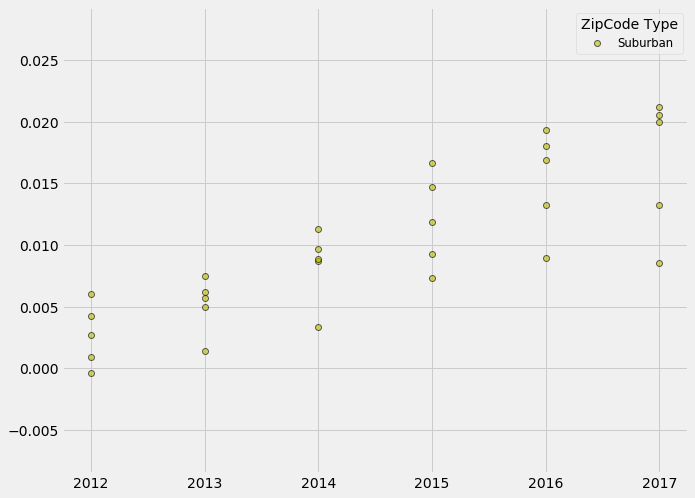

In [71]:
plt.rcParams['figure.figsize']=(10,8) # set the figure size
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme
plt.grid()
marker_factor = 1000

suburban_x_axis = merge_data5[(merge_data5["Type"] == 'Suburban') & (merge_data5["Zip"].isin([78730,78750,78754,78738,78610]))]["Year"].values
suburban_y_axis = merge_data5[(merge_data5["Type"] == 'Suburban') & (merge_data5["Zip"].isin([78730,78750,78754,78738,78610]))]["value_rate"].values
suburban_DI = merge_data5[(merge_data5["Type"] == 'Suburban') & (merge_data5["Zip"].isin([78730,78750,78754,78738,78610]))]["DI_rate"].values * marker_factor

suburban_handle = plt.scatter(suburban_x_axis, suburban_y_axis, marker="o", facecolors ="y", edgecolors="black", linewidths = 1, alpha = .6, label = "Suburban")

# plt.xlim(2,40.5)
# plt.ylim(18.5,44)
# plt.title("Property value and Diversity Index Rate Change")
# plt.xlabel("Year")
# plt.ylabel("Median Property Value Rate Charge YoY ($)")
lgnd = plt.legend(loc = "best", title = "ZipCode Type", fontsize = "small")
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]
# lgnd.legendHandles[2]._sizes = [30]
# plt.text(42,37,'Note:')
# plt.text(42,35.5,'Circle size correlates with driver count per city.')
plt.grid()

plt.savefig("images/06-01-agustin-scatter.png")
plt.show()